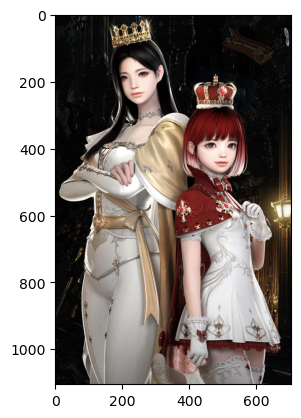

In [207]:
# 1. 사진 읽어오기
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import sys
import dlib
import os

testImage = Image.open("./sample/sample.png")
testImage = np.array(testImage)

plt.imshow(testImage)

In [208]:
#testImage = cv2.resize(testImage,(500,700))

In [209]:
# 2. 얼굴 인식
face_detector = dlib.get_frontal_face_detector()

face_detection = face_detector(testImage, 1)

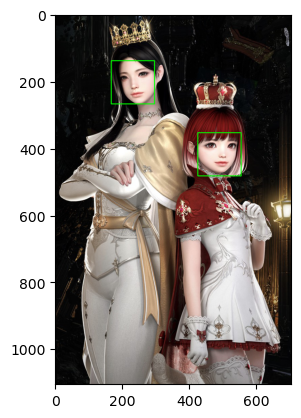

In [210]:
for face_detection in face_detection:
    left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection.right(), face_detection.bottom()
    cv2.rectangle(testImage,(left,top),(right,bottom),(0,255,0),2)
    
plt.imshow(testImage)

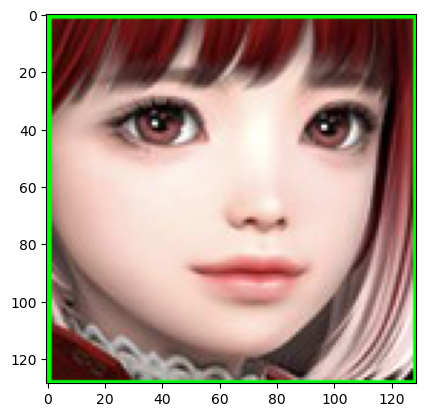

In [211]:
# 3. 얼굴 부분 이미지 가져오기
left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection.right(), face_detection.bottom()

testImage = testImage[top:bottom, left:right]

plt.imshow(testImage)

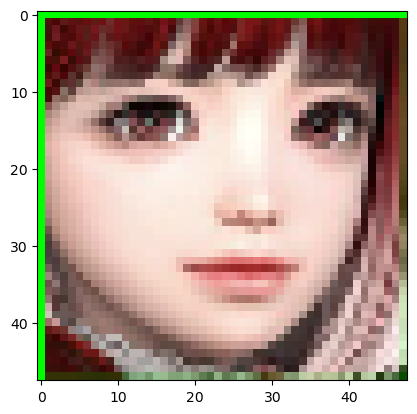

In [212]:
# 4. 감정인식 가능한 크기 및 형태로 resize
testImage = cv2.resize(testImage,(48,48))

testImage.shape

plt.imshow(testImage)

In [213]:
testImage = testImage/255

In [214]:
testImage = np.expand_dims(testImage,axis=0)
testImage.shape

(1, 48, 48, 3)

In [215]:
# 5. 감정인식 모델 가져오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

from keras.models import load_model
model = load_model('emotion_classification_model_higher_epochs.h5')



In [216]:
# 6. 감정 분류
pred_probability = model.predict(testImage)
pred_probability

1/1 [==============================] - 0s 192ms/step


array([[2.1528620e-03, 6.3404667e-07, 4.7459611e-04, 5.2734025e-02,
        9.4032526e-01, 4.2815953e-03, 3.1102194e-05]], dtype=float32)

In [217]:
# 7. 분류된 감정 중 가장 높은값 찾기
pred = np.argmax(pred_probability)
pred

4

In [218]:
def pred_emotion(pred):
    match pred:
        case 0:
            print("Angry")
            return "Angry"
        case 1:
            print("Disgust")
            return "Disgust"
        case 2:
            print("Fear")
            return "Fear"
        case 3:
            print("Happy")
            return "Happy"
        case 4:
            print("Neutral")
            return "Neutral"
        case 5:
            print("Sad")
            return("Sad")
        case 6:
            print("Surprise")
            return "Surprise"

In [219]:
pred_emotion(pred)
file = open("./predicted/PredictedEmotion.txt","w")
file.write(pred_emotion(pred))
file.close()

Neutral
Neutral
